# Feedforward Binary Classifier

A **Feedforward Binary Classifier** is a type of neural network that performs binary classification, meaning it predicts one of two possible classes (e.g., 0 or 1, True or False, Cat or Dog).

#### **Summary:**
1. **Feedforward Neural Network (FFNN):**  
   - This is a neural network where information moves in only one direction—from input to output—without loops or cycles.  
   - Each layer's neurons pass their outputs to the next layer without feedback connections.

2. **Binary Classification:**  
   - The model predicts a binary outcome (two classes).  
   - It uses a **sigmoid activation function** in the output layer to output a probability between 0 and 1.  
   - If the probability is above a threshold (usually 0.5), it predicts one class; otherwise, it predicts the other.

#### **Architecture:**
- **Input Layer:** Takes 20 features as input.
- **Hidden Layers:** Two layers with 64 and 32 neurons using the **sigmoid activation function**.
- **Output Layer:** A single neuron with a **sigmoid activation** to output a probability for the binary class.
- **Loss Function:** `binary_crossentropy`, which is ideal for binary classification.
- **Optimizer:** Adam, which helps efficiently update the weights.

#### **Use Cases:**
- Spam detection (Spam or Not Spam)
- Disease prediction (Positive or Negative)
- Sentiment analysis (Positive or Negative)
- Fraud detection (Fraudulent or Legitimate)

Would you like a deeper breakdown or modifications to improve the model? 🚀

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [33]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- make_classification: Generates a random classification dataset. We create a dataset with 1000 samples, 20 features, and a random state for reproducibility.

- train_test_split: Splits the dataset into training and testing sets to evaluate the model's performance on unseen data.

- StandardScaler: Scales the data to have zero mean and unit variance, which can improve the training process.

In [36]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Sequential: Creates a linear stack of layers for the neural network.

- Dense: Represents a fully connected layer, where each neuron is connected to every neuron in the previous layer.

- activation: Specifies the activation function to be used by the neurons in the layer. We use sigmoid for binary classification.

In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5401 - loss: 0.6900 - val_accuracy: 0.6875 - val_loss: 0.6733
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7508 - loss: 0.6619 - val_accuracy: 0.6938 - val_loss: 0.6528
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7085 - loss: 0.6376 - val_accuracy: 0.7500 - val_loss: 0.6251
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7502 - loss: 0.6034 - val_accuracy: 0.7688 - val_loss: 0.5953
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7483 - loss: 0.5823 - val_accuracy: 0.7812 - val_loss: 0.5673
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7825 - loss: 0.5442 - val_accuracy: 0.7750 - val_loss: 0.5388
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8107 - loss: 0.5023 - val_accuracy: 0.7688 - val_loss: 0.5161
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8091 - loss: 0.4677 - val_accuracy: 0.7750 - val_loss

- optimizer: Specifies the optimization algorithm used to update the model's weights during training. We use adam, a popular choice.

- loss: Specifies the loss function used to measure the difference between the model's predictions and the actual target values. We use binary_crossentropy for binary classification.

- metrics: Specifies the metrics to be used to evaluate the model's performance. We use accuracy to measure the percentage of correctly classified samples.

---

- fit: Trains the model using the training data.
epochs: Specifies the number of times the model will iterate over the entire training dataset.

- batch_size: Specifies the number of samples to be processed before updating the model's weights.

- validation_split: Specifies the proportion of the training data to be used for validation. This helps to monitor the model's performance on unseen data during training.

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

predictions = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Test Accuracy: 83.50%
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy Score: 83.50%


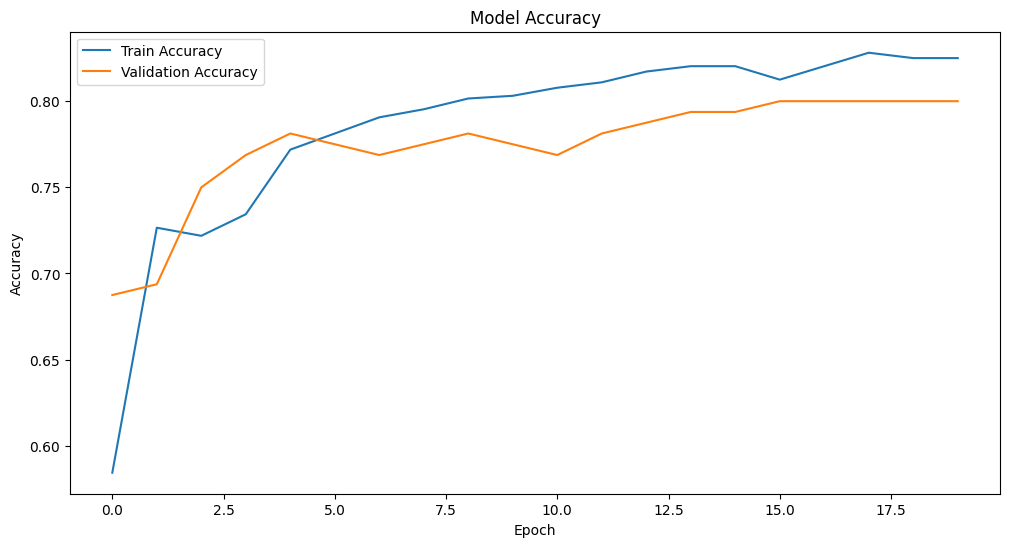

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
model.save("feedforward_model.h5")